In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

####
order_datetime - time of the order
origin_longitude - longitude of the order
origin_latitude - latitude of the order
m_order_eta - time before order arrival
order_gk - order number
order_status_key - status, an enumeration consisting of the following mapping:
4 - cancelled by client,
9 - cancelled by system, i.e., a reject
is_driver_assigned_key - whether a driver has been assigned
cancellation_time_in_seconds - how many seconds passed before cancellation
The data_offers data set is a simple map with 2 columns:

order_gk - order number, associated with the same column from the orders data set
offer_id - ID of an offer
####

In [4]:
pedidos=pd.read_csv("data_orders.csv") #creamos un DF que nos almacene los datos que vienen en el excel

In [5]:
pedidos.shape #mostrar la dimension de nuestra tabla rows, columns

(10716, 8)

In [6]:
pedidos.sample(n=10, random_state=42) # la muestra sera de 10 elementos con un the random_state argument ensures that we get the same sample

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
10309,00:29:14,-0.966062,51.454821,NaN,3000555146103,4,0,44.0
6705,01:28:45,-0.970472,51.456725,NaN,3000595870644,4,0,121.0
304,08:22:36,-0.916708,51.439852,NaN,3000627783633,9,0,NaN
9143,07:32:27,-0.955580,51.453493,1078.0,3000622140805,4,1,1017.0
10593,04:39:55,-0.946358,51.439779,NaN,3000554645524,4,0,121.0
8654,08:05:02,-0.967327,51.449395,598.0,3000592772077,4,1,48.0
3919,00:21:47,-0.971597,51.457574,NaN,3000624492441,4,0,180.0
4337,20:26:40,-0.971296,51.458115,NaN,3000628755869,4,0,104.0
6931,07:25:39,-0.942301,51.474812,NaN,3000628430595,4,0,44.0
967,13:41:31,-0.952194,51.444067,NaN,3000623591189,9,0,NaN


In [7]:
pedidos.describe() #muestro un resumen de todo el Dataframe

,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
count,10716.000000,10716.000000,2814.000000,1.071600e+04,10716.000000,10716.000000,7307.000000
mean,-0.964323,51.450541,441.415423,3.000598e+12,5.590612,0.262598,157.892021
std,0.022818,0.011984,288.006379,2.396261e+07,2.328845,0.440066,213.366963
min,-1.066957,51.399323,60.000000,3.000550e+12,4.000000,0.000000,3.000000
25%,-0.974363,51.444643,233.000000,3.000583e+12,4.000000,0.000000,45.000000
50%,-0.966386,51.451972,368.500000,3.000595e+12,4.000000,0.000000,98.000000
75%,-0.949605,51.456725,653.000000,3.000623e+12,9.000000,1.000000,187.500000
max,-0.867088,51.496169,1559.000000,3.000633e+12,9.000000,1.000000,4303.000000


In [8]:
ofertas=pd.read_csv("data_offers.csv")  #creo otro DF que me almacena los datos del excel de las ofertas

In [9]:
ofertas.sample(n=10, random_state=42) #establesco una muestra de 10 elementos 

,order_gk,offer_id
244971,3000627481054,300052086404
236783,3000631282042,300052342376
22714,3000624367715,300051909011
306983,3000557436646,300050769980
170256,3000588131807,300051201442
316173,3000629756224,300052250019
234398,3000625018320,300051967737
122107,3000629082264,300052196687
60909,3000588606991,300051225443
52998,3000629981908,300052274857


UNA VEZ QUE YA TENEMOS MUESTREADAS NUESTROS 2 DF LO QUE HAREMOS SERA UNIRLOS EN UN NUEVO DF

In [10]:
df=pedidos.merge(right=ofertas,how="inner", on="order_gk") #utilizo los parametros del comando merge recordemos que on es el emento que comparten ambas bases y how es de que lado quiero que vayan

In [11]:
df.sample(n=10, random_state=42)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,offer_id
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,4,1,223.0,300050725946
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,4,0,91.0,300052014519
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,4,0,68.0,300051458740
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,4,0,125.0,300052031394
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,4,0,11.0,300050671163
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,9,0,NaN,300051413313
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,4,0,6.0,300051090742
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,9,0,NaN,300051125957
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,4,0,113.0,300052078801
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,4,1,47.0,300051178628


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31268 entries, 0 to 31267
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 31268 non-null  object 
 1   origin_longitude               31268 non-null  float64
 2   origin_latitude                31268 non-null  float64
 3   m_order_eta                    8364 non-null   float64
 4   order_gk                       31268 non-null  int64  
 5   order_status_key               31268 non-null  int64  
 6   is_driver_assigned_key         31268 non-null  int64  
 7   cancellations_time_in_seconds  21795 non-null  float64
 8   offer_id                       31268 non-null  int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 2.4+ MB


podemos mejorar un poco la calidad de los datos del nuevo DF unido, si nos fijamos en el DF las columnas de order status key solo maneja numeros como clave de cancelacion lo mismo que is_driver_assigned_key

In [13]:
import numpy as np

df["is_driver_assigned"] = np.where(df["is_driver_assigned_key"] == 1, "Yes", "No") #creo una nueva columna a raiz de una condicion de la columna original
df["order_status"] = np.where(df["order_status_key"] == 4, "Client Cancelled", "System Reject") #mismo caso

df.drop(columns=["is_driver_assigned_key", "order_status_key"], inplace=True) #elimino las columnas con las etiquetas especificas y le ponemos al implace True: la eliminación se realiza en el DataFrame actual. Si es False: devuelve una copia en la que se ha realizado la eliminación.

In [14]:
df = df.rename(columns={ # le cambio de nombre a la columna order_datetime, el cambio de nombre sera permanente 
    "order_datetime": "order_time"
})

In [15]:
df.sample(n=10, random_state=42) #vuelvo a pedir una muestra de 10 elementos(filas) en un estado aleatorio de 42

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Yes,Client Cancelled
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,No,Client Cancelled
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,No,Client Cancelled
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,No,Client Cancelled
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,No,Client Cancelled
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,NaN,300051413313,No,System Reject
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,6.0,300051090742,No,Client Cancelled
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,NaN,300051125957,No,System Reject
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,113.0,300052078801,No,Client Cancelled
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,47.0,300051178628,Yes,Client Cancelled


PREGUNTA 1 -Construya la distribución de pedidos según los motivos del fracaso: cancelaciones antes y después de la asignación del conductor y motivos del rechazo del pedido. Analice la trama resultante. ¿Qué categoría tiene el mayor número de pedidos?

In [16]:
df.groupby(by=["is_driver_assigned", "order_status"])["order_gk"].count() #count es para contar el numero de veces que aparece en una lista un objeto determinado. 
#Groupby es una de las funciones de Pandas más utilizadas en el análisis de datos. Se utiliza para agrupar los puntos de datos (es decir, filas) en función de los distintos valores en la columna o columnas dadas. Luego podemos calcular valores agregados para los grupos generados.

is_driver_assigned  order_status    
No                  Client Cancelled    13435
                    System Reject        9469
Yes                 Client Cancelled     8360
                    System Reject           4
Name: order_gk, dtype: int64

In [17]:
#Aqui podemos ver como queda el resultado de la 1 pregunta

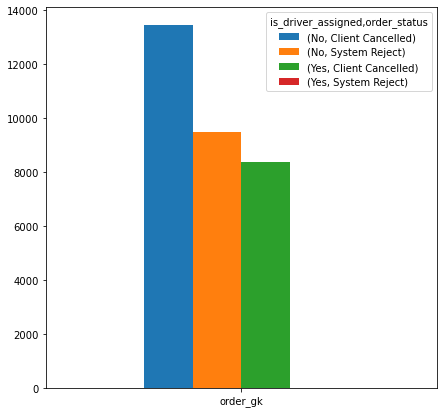

In [18]:
df_q1 = df.pivot_table(columns=["is_driver_assigned", "order_status"], values="order_gk", aggfunc="count") #asi podria armar una tabla dinamica en pyton........ aggfunc= funcion de agregacion
_ = df_q1.plot(kind="bar", subplots=False, figsize=(7, 7), legend=True, rot=0)

PREGUNTA 2-Grafique la distribución de pedidos fallidos por horas. ¿Hay una tendencia a que ciertas horas tengan una proporción anormalmente alta de una categoría u otra? ¿Qué horas son las fallas más grandes? ¿Cómo se puede explicar esto?

In [19]:
import seaborn as sns #libreria para 

In [20]:
df['Hour']=df["order_time"].str.split(':', 1,expand=True)[0].astype('int64') #aqui lo que hice fue crear una nueva columna  de horas donde elimino el los: debido a que es un string

In [21]:
df.sample(n=10, random_state=42)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,Hour
30194,21:15:35,-0.969588,51.455780,299.0,3000555697076,223.0,300050725946,Yes,Client Cancelled,21
14748,10:13:35,-0.955958,51.430362,NaN,3000626091676,91.0,300052014519,No,Client Cancelled,10
29083,09:16:38,-1.033560,51.441967,NaN,3000594099225,68.0,300051458740,No,Client Cancelled,9
16926,02:08:09,-0.967676,51.444489,NaN,3000626980467,125.0,300052031394,No,Client Cancelled,2
21530,21:44:21,-0.972683,51.456762,NaN,3000554421440,11.0,300050671163,No,Client Cancelled,21
13008,03:03:45,-0.966745,51.453236,NaN,3000593295623,NaN,300051413313,No,System Reject,3
2034,14:41:22,-0.948642,51.449587,NaN,3000584916226,6.0,300051090742,No,Client Cancelled,14
2229,20:54:03,-0.991382,51.476339,NaN,3000585716553,NaN,300051125957,No,System Reject,20
16632,18:06:17,-0.948907,51.444643,NaN,3000627382471,113.0,300052078801,No,Client Cancelled,18
18189,07:52:29,-0.973793,51.458665,479.0,3000587781360,47.0,300051178628,Yes,Client Cancelled,7


<AxesSubplot:title={'center':'Amount of failed orders by hour'}, xlabel='Hour', ylabel='Failed orders'>

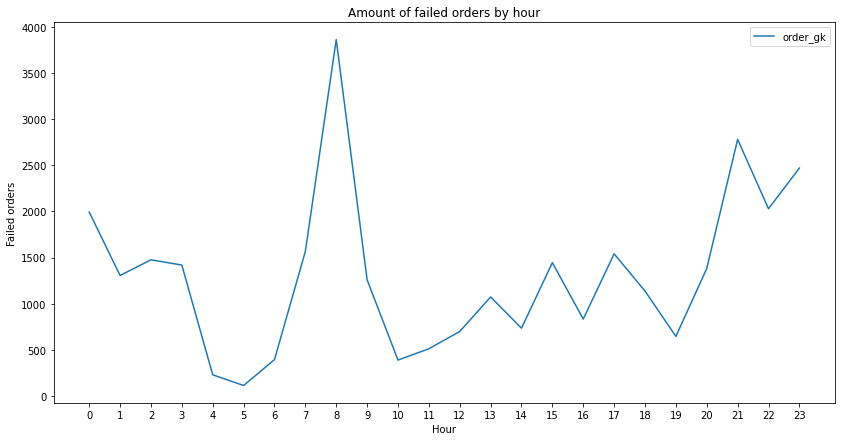

In [22]:
#graficamos la distribucion de pedidos por hora en relacion al numero de orden esto es de manera general sin tomar en cuenta la agrupacion 
pd.pivot_table(index='Hour', values='order_gk', aggfunc='count', data= df).plot(figsize=(14,7),
title='Amount of failed orders by hour',ylabel='Failed orders',xticks=range(0,24))

<AxesSubplot:title={'center':'Amount of failed orders by hour'}, xlabel='Hour', ylabel='Failed orders'>

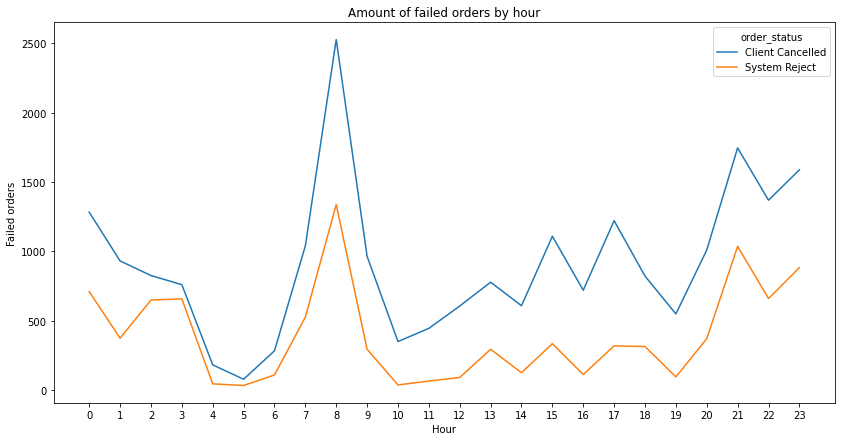

In [23]:
#aqui graficamos de manera especifica en relacion al estatus de la orden en ese caso son cancelados por el cliente y por el sistema

pd.pivot_table(index='Hour',values='order_gk',columns='order_status',aggfunc='count', #le colocamos el colums ya que sto especifica la agrupación de nivel de columna.
               data=df).plot(figsize=(14,7),title='Amount of failed orders by hour',ylabel='Failed orders',xticks=range(0,24))

<AxesSubplot:title={'center':'Amount of failed orders by hour'}, xlabel='Hour', ylabel='Failed orders'>

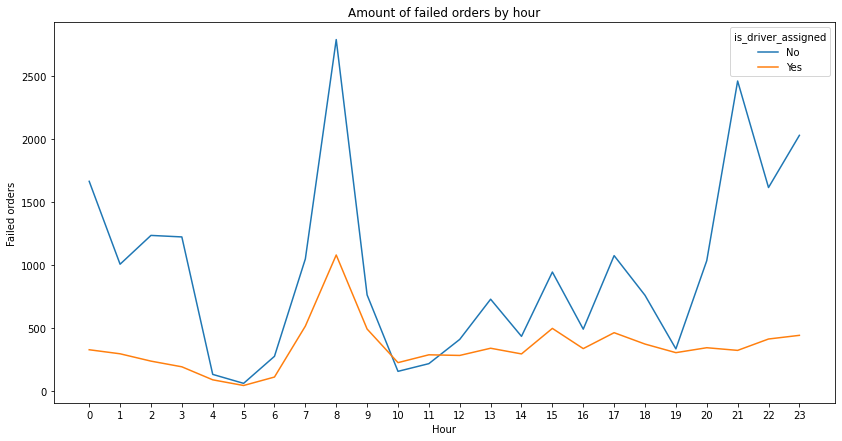

In [24]:
#aqui graficamos deacuerdo a la categoria de asigancion de conductor
pd.pivot_table(index='Hour',values='order_gk',columns='is_driver_assigned',aggfunc='count',
               data=df).plot(figsize=(14,7),title='Amount of failed orders by hour',ylabel='Failed orders',xticks=range(0,24))

PREGUNTA 3-Grafique el tiempo promedio de cancelación con y sin conductor, por hora. Si hay valores atípicos en los datos, sería mejor eliminarlos. ¿Podemos sacar alguna conclusión de esta trama?

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31268 entries, 0 to 31267
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_time                     31268 non-null  object 
 1   origin_longitude               31268 non-null  float64
 2   origin_latitude                31268 non-null  float64
 3   m_order_eta                    8364 non-null   float64
 4   order_gk                       31268 non-null  int64  
 5   cancellations_time_in_seconds  21795 non-null  float64
 6   offer_id                       31268 non-null  int64  
 7   is_driver_assigned             31268 non-null  object 
 8   order_status                   31268 non-null  object 
 9   Hour                           31268 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 2.6+ MB


<AxesSubplot:title={'center':'Avg cancellations time in seconds by hour'}, xlabel='Hour', ylabel='Avg cancellation time(seconds)'>

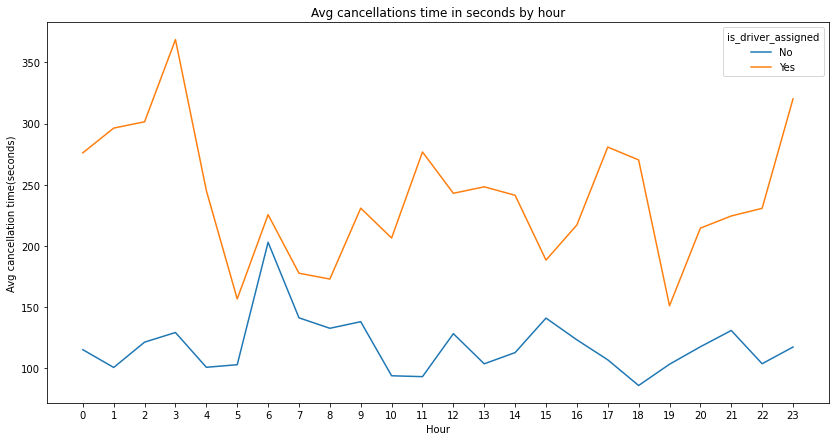

In [26]:
pd.pivot_table(index='Hour',values='cancellations_time_in_seconds',columns='is_driver_assigned',
               aggfunc='mean',data=df).plot(title='Avg cancellations time in seconds by hour',
                                               figsize=(14,7),ylabel='Avg cancellation time(seconds)',xticks=range(0,24))

In [27]:
df.head(10)

,order_time,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds,offer_id,is_driver_assigned,order_status,Hour
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,198.0,300050983403,Yes,Client Cancelled,18
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986179,No,Client Cancelled,20
2,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986174,No,Client Cancelled,20
3,20:57:32,-0.950385,51.456843,NaN,3000583116437,128.0,300050986180,No,Client Cancelled,20
4,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976275,Yes,Client Cancelled,12
5,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976284,Yes,Client Cancelled,12
6,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976283,Yes,Client Cancelled,12
7,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976271,Yes,Client Cancelled,12
8,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976274,Yes,Client Cancelled,12
9,12:07:50,-0.969520,51.455544,477.0,3000582891479,46.0,300050976278,Yes,Client Cancelled,12


4-Grafique la distribución de la ETA(time before order arrival) promedio por horas. ¿Cómo se puede explicar esta trama?


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31268 entries, 0 to 31267
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_time                     31268 non-null  object 
 1   origin_longitude               31268 non-null  float64
 2   origin_latitude                31268 non-null  float64
 3   m_order_eta                    8364 non-null   float64
 4   order_gk                       31268 non-null  int64  
 5   cancellations_time_in_seconds  21795 non-null  float64
 6   offer_id                       31268 non-null  int64  
 7   is_driver_assigned             31268 non-null  object 
 8   order_status                   31268 non-null  object 
 9   Hour                           31268 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 2.6+ MB


In [29]:
#como nos podemos dar cuenta el eta cuenta con 22,903 datos nulos los cual debemos eliniar ya que pueden afectar el analisis

<AxesSubplot:title={'center':'Avg ETA by hour'}, xlabel='Hour', ylabel='Avg ETA'>

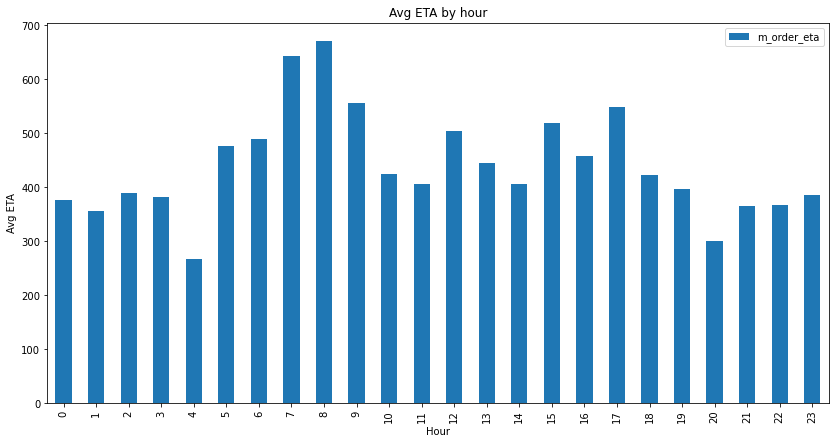

In [35]:
q4_df = df.dropna(subset='m_order_eta') #esta linea de codigo es para eliminar los valores nulos del ETA

pd.pivot_table(index='Hour',values='m_order_eta', aggfunc='mean', data=q4_df).plot(title='Avg ETA by hour',
                                                                    kind='bar',ylabel='Avg ETA',figsize=(14,7))



In [33]:
#Ahora graficaremos si fueronn cancelados por el sistema o el cliente

<AxesSubplot:title={'center':'Avg ETA by hour'}, xlabel='Hour', ylabel='Avg ETA'>

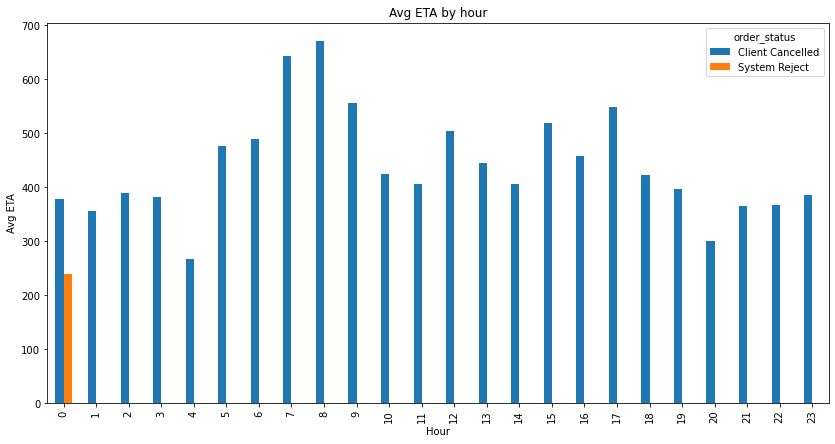

In [37]:
pd.pivot_table(index='Hour',values='m_order_eta',columns='order_status', aggfunc='mean',
               data=q4_df).plot(title='Avg ETA by hour',kind='bar',ylabel='Avg ETA',figsize=(14,7))